## Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

## Objective

- To predict whether a liability customer will buy a personal loan or not.
- Which variables are most significant.
- Which segment of customers should be targeted more.

## Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

## Data Structure and Summary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from pyzipcode import ZipCodeDatabase
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split, GridSearchCV

sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('Loan_Modelling.csv')   # original data

In [3]:
df = data.copy()  # make a copy of the original data

In [4]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [6]:
df.shape

(5000, 14)

**Observation:** The data set consists of 5000 rows and 14 columns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observation:** All the columns are numerical variables. Personal_Loan is the depedent variable.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Observation:**
- No missing values.
- ID seems to be merely a sequential Index for customers.
- Age ranges from 23 to 67, with equal mean and median.
- Experience has the minimum of -3, which doesn't make sense. It should be a non negative number since it represents the number of years of professional experience. Guess there's input error here and these records should be dropped. The mean and median are equal.
- Income has a wide range from \\$ 8k to \\$ 224k. Mean is larger than median, indicating possible outliers on the upper end.
- Family size ranges from 1 to 4. Median is 2.
- 75% customers pay \\$ 2.5k per month on credit card on average, though some could pay as high as \\$ 10k.
- Home mortgage ranges from 0 to \\$ 635 k. At least 50% of customers have zero balance.
- At least 75% of customers didn't accept the personal loan offered in the last campaign.
- At least 75% of customers don't have security account or CD account with AllLife Bank.
- More than 50% of customers use online banking.
- At least 50% of customers don't use a credit card issued by any other banks.

## Data Pre-processing

### Check unique values

In [9]:
# check the unique values in each column
for col in df.columns:
    print("the number of unique values in " + col + " :" + str(df[col].nunique()) )
    print(sorted(df[col].unique()))
    print("")

the number of unique values in ID :5000
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 21

**Observation:**
- Experience has negative values -1, -2 and -3, totally 52 observations.
- There're 467 unique zip code in this dataset. In order to better undertand the data, consider casting ZIPCode to geographic location. 
- Other columns seem to be normal. 
- ID, Age, Experience, Income, ZIPCode, CCAvg, Mortgage are continuous variables. Others are categorical variables.

### Delete negative Experience

In [10]:
df = df[df.Experience >= 0]    # drop df.Experience < 0 rows

### Cast ZIPCode to location

In [11]:
# cast zipcode to city and state
zc = ZipCodeDatabase()
zip_city_state = {}   # dictionary, key: zip code, value: (city, state)

for z in df.ZIPCode.unique():
    if z not in zc:
        print("zip code not found: ", z) 
    else:
        zip_city_state[z] = (zc[z].city, zc[z].state)

zip code not found:  92717
zip code not found:  93077
zip code not found:  92634
zip code not found:  96651


In [12]:
# hard code city and state of the above zip codes
zip_city_state[92717] = ("Irvine", "CA")
zip_city_state[93077] = ("Ventura", "CA")
zip_city_state[92634] = ("Fullerton", "CA")
zip_city_state[96651] = ("San Francisco", "CA")    # military installation

In [13]:
df["City"] = df["ZIPCode"].apply(lambda x: zip_city_state[x][0])
df["State"] = df["ZIPCode"].apply(lambda x: zip_city_state[x][1])

In [14]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City,State
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Pasadena,CA
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles,CA
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Berkeley,CA
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco,CA
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Northridge,CA


### Check data description

In [15]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,4948.0,NaN,NaN,NaN,2501.268795,1443.277676,1.0,1254.75,2497.5,3750.25,5000.0
Age,4948.0,NaN,NaN,NaN,45.557195,11.320735,24.0,36.0,46.0,55.0,67.0
Experience,4948.0,NaN,NaN,NaN,20.331043,11.311973,0.0,10.75,20.0,30.0,43.0
Income,4948.0,NaN,NaN,NaN,73.81447,46.112596,8.0,39.0,64.0,98.0,224.0
ZIPCode,4948.0,NaN,NaN,NaN,93168.503436,1761.076366,90005.0,91911.0,93437.0,94608.0,96651.0
Family,4948.0,NaN,NaN,NaN,2.391471,1.148444,1.0,1.0,2.0,3.0,4.0
CCAvg,4948.0,NaN,NaN,NaN,1.935926,1.747694,0.0,0.7,1.5,2.6,10.0
Education,4948.0,NaN,NaN,NaN,1.878941,0.839745,1.0,1.0,2.0,3.0,3.0
Mortgage,4948.0,NaN,NaN,NaN,56.634398,101.828885,0.0,0.0,0.0,101.0,635.0
Personal_Loan,4948.0,NaN,NaN,NaN,0.097009,0.296,0.0,0.0,0.0,0.0,1.0


**Observation:** Now we have 4948 rows. All the customers are from California. Among 242 Cities, Los Angeles appears most frequently.

## Univariate Analysis

### The distribution of continuous variables

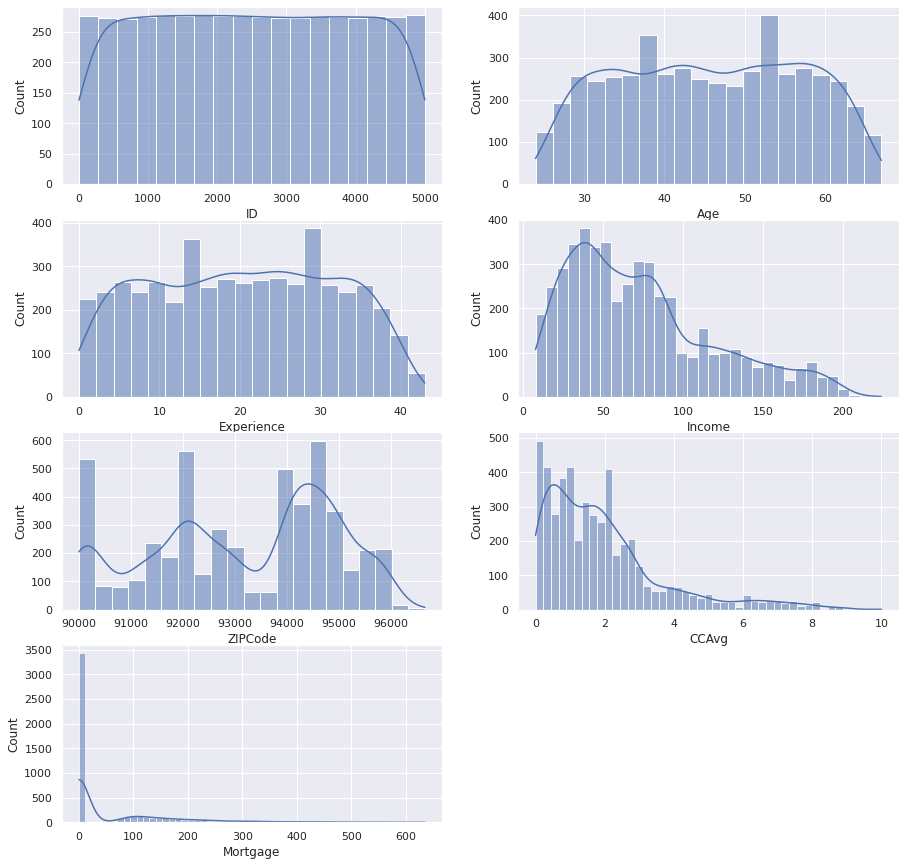

In [16]:
continuous_cols = ['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'CCAvg', 'Mortgage']   # continuous columns

plt.figure(figsize = (15,15))
for i, col in enumerate(continuous_cols):
    plt.subplot(4,2, i + 1)
    sns.histplot(df[col], kde = True);     # histogram

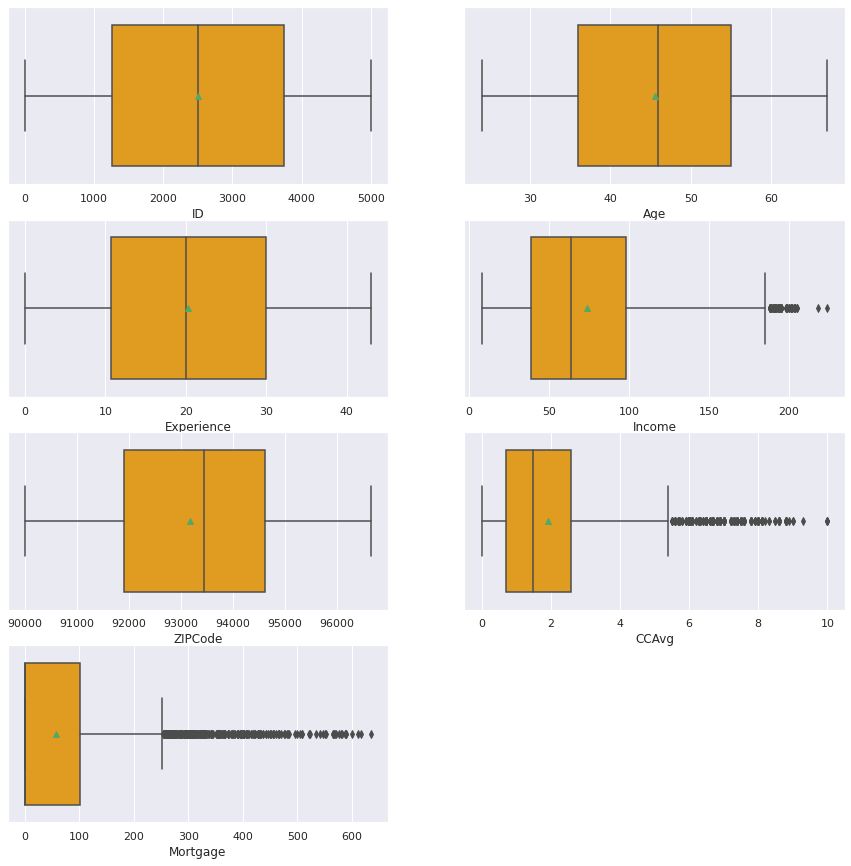

In [17]:
plt.figure(figsize = (15,15))
for i, col in enumerate(continuous_cols):
    plt.subplot(4,2, i + 1)
    sns.boxplot(x = col, data = df, color = 'orange', showmeans = True);   # box plot

**Observation:**
- ID, Age and Experience are not skewed and have no outliers.
- Income, CCAvg and Mortgage are right skewed, with lots of outliers on the right end.
- ZIPCode is left skewed and has no outliers.

### The distribution of categorical variables

In [18]:
category_cols = list(set(df.columns) - set(continuous_cols))  # category columns
category_cols

['City',
 'Family',
 'Online',
 'State',
 'Securities_Account',
 'CD_Account',
 'Education',
 'Personal_Loan',
 'CreditCard']

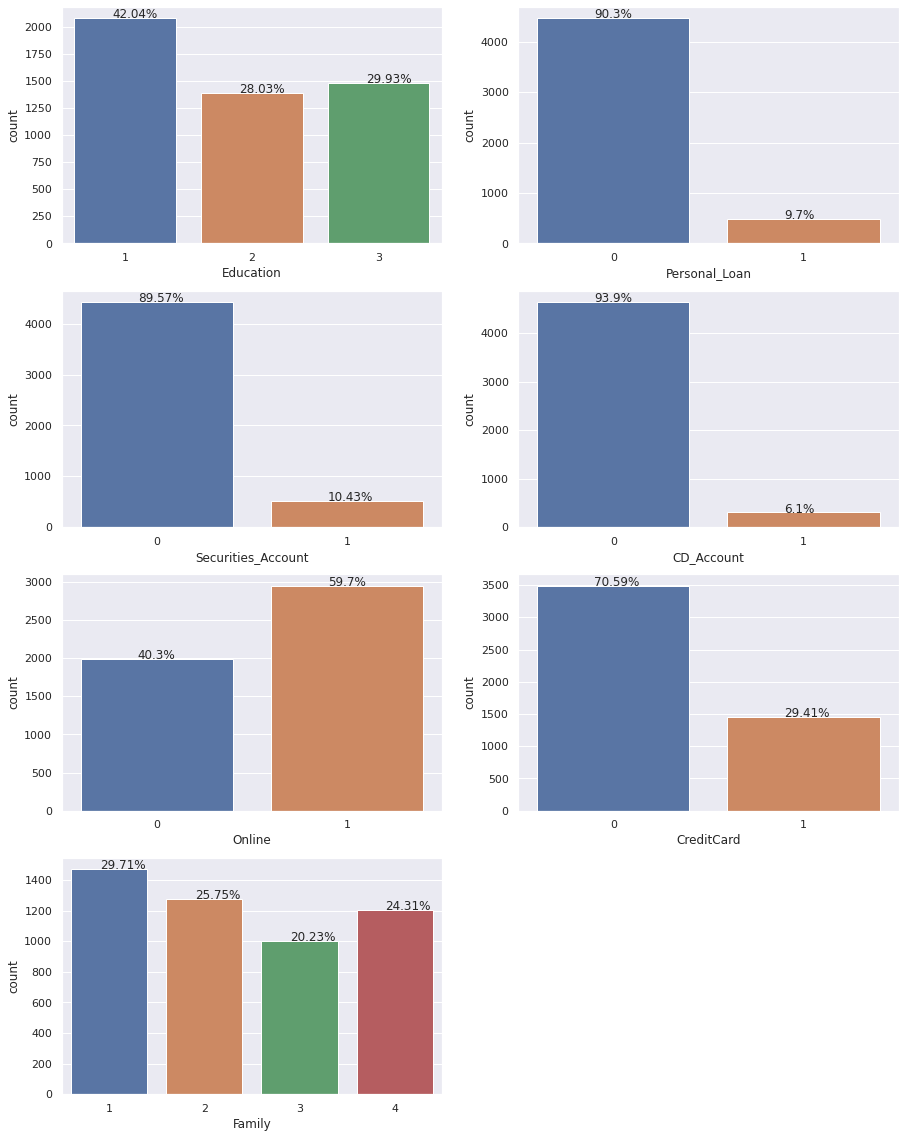

In [19]:
plt.figure(figsize = (15,20))

for i, col in enumerate(['Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Family']):
    plt.subplot(4,2, i + 1)
    ax = sns.countplot(data = df, x = col);     # cout plot
    total = df.shape[0]
    for p in ax.patches:
        percent = p.get_height() / total * 100
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_y() + p.get_height() + 0.1
        ax.annotate(str(round(percent, 2)) + '%', (x, y), fontsize = 12)

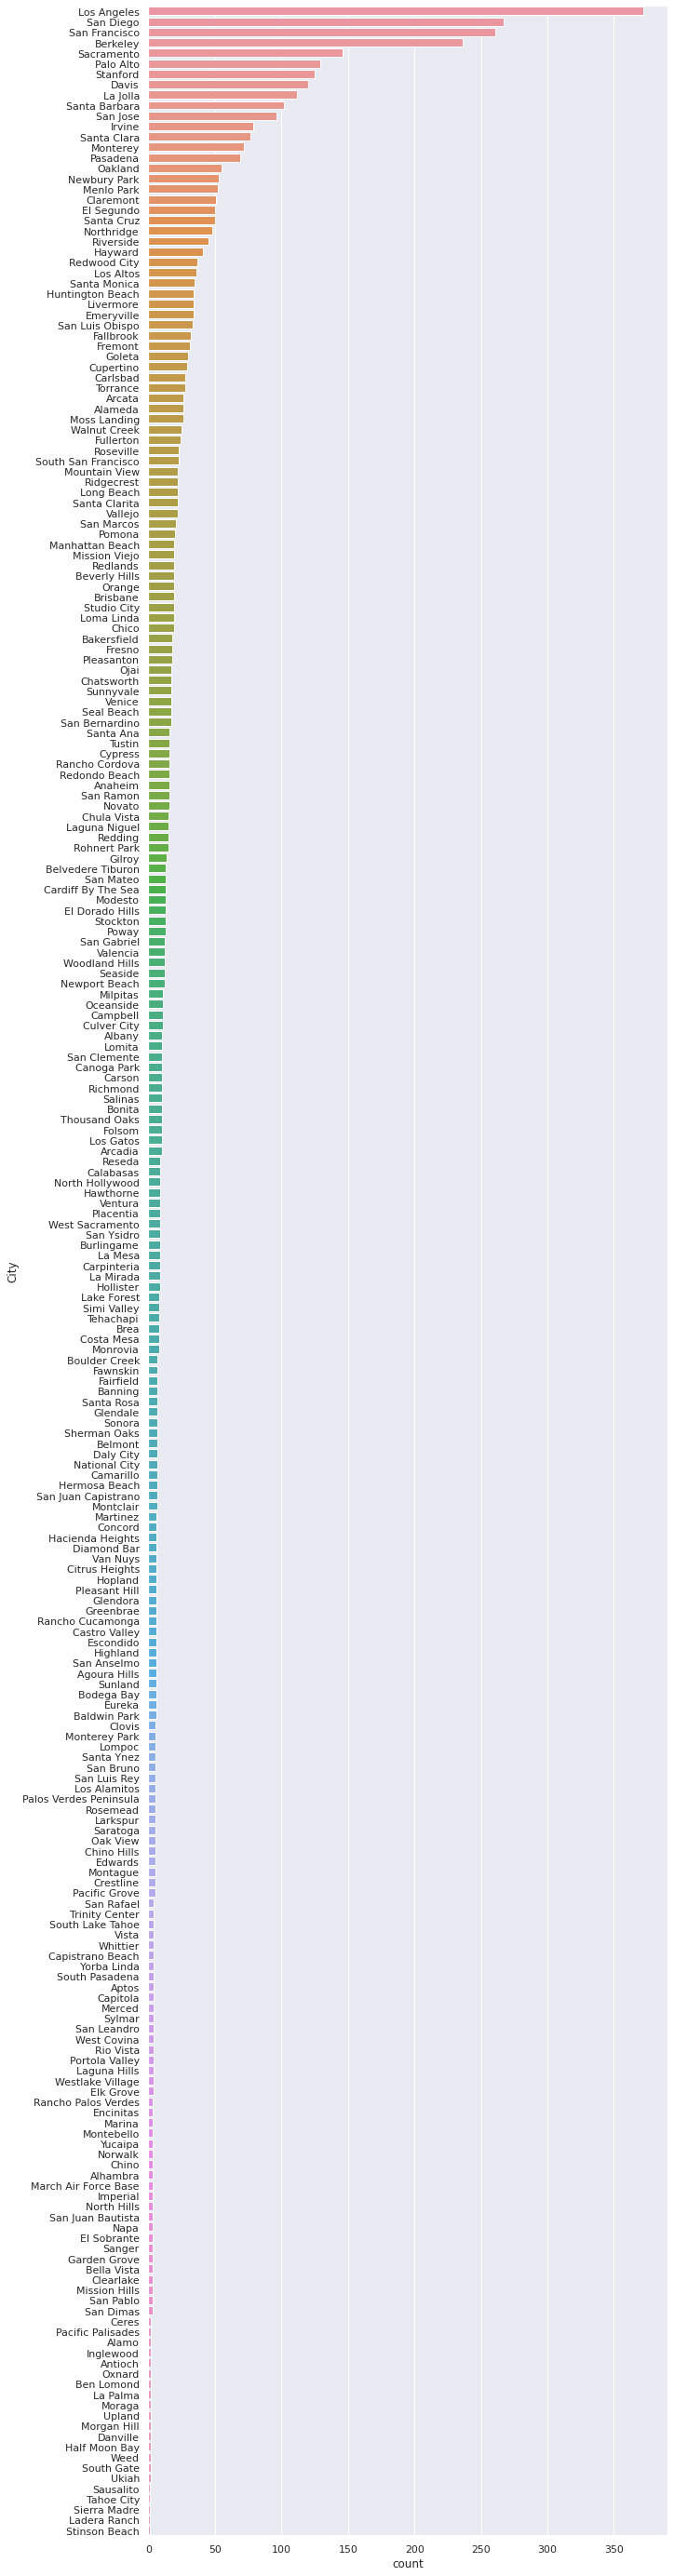

In [20]:
plt.figure(figsize = (10,50))
sns.countplot(data = df, y = "City", order = df.City.value_counts(ascending = False).index);     # cout plot

**Observation:**
- 30% of customers are single, followed by family size of 2 and 4.
- Only 9.7% of customers took the personal loan in the last campagin, which matches the result of the campaign last year for liability customers with a conversion rate of over 9% success. The dataset is very imbalanced.
- 60% of customers used internet banking facility.
- Although majority customers are depositors, only a few have certificate of deposit account and securities account. Maybe they just go with saving account or checking account.
- About 30% of customers have a credit card issued by any other banks.
- 42% of customers are undergraduate. The numbers of professional and graduate are quite alike.
- Top three cities our borrowers come from are Los Angeles, San Diego and San Francisco. It makes sense that they're also the cities with largest population in California.

## Bivariate Analysis

### Heatmap and pairplot

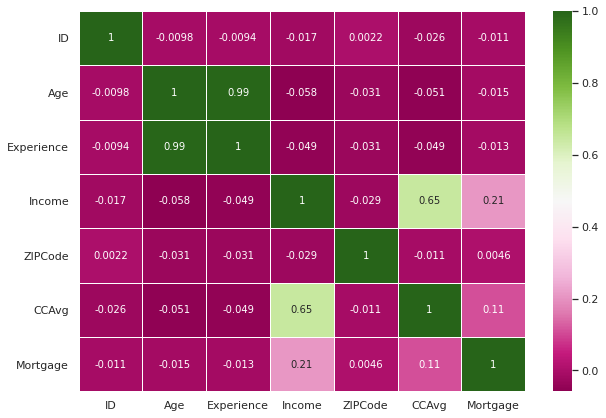

In [21]:
plt.figure(figsize = (10,7))
sns.heatmap(data = df[continuous_cols].corr(), annot = True, cmap = 'PiYG', linewidths = 0.5);    # heat map

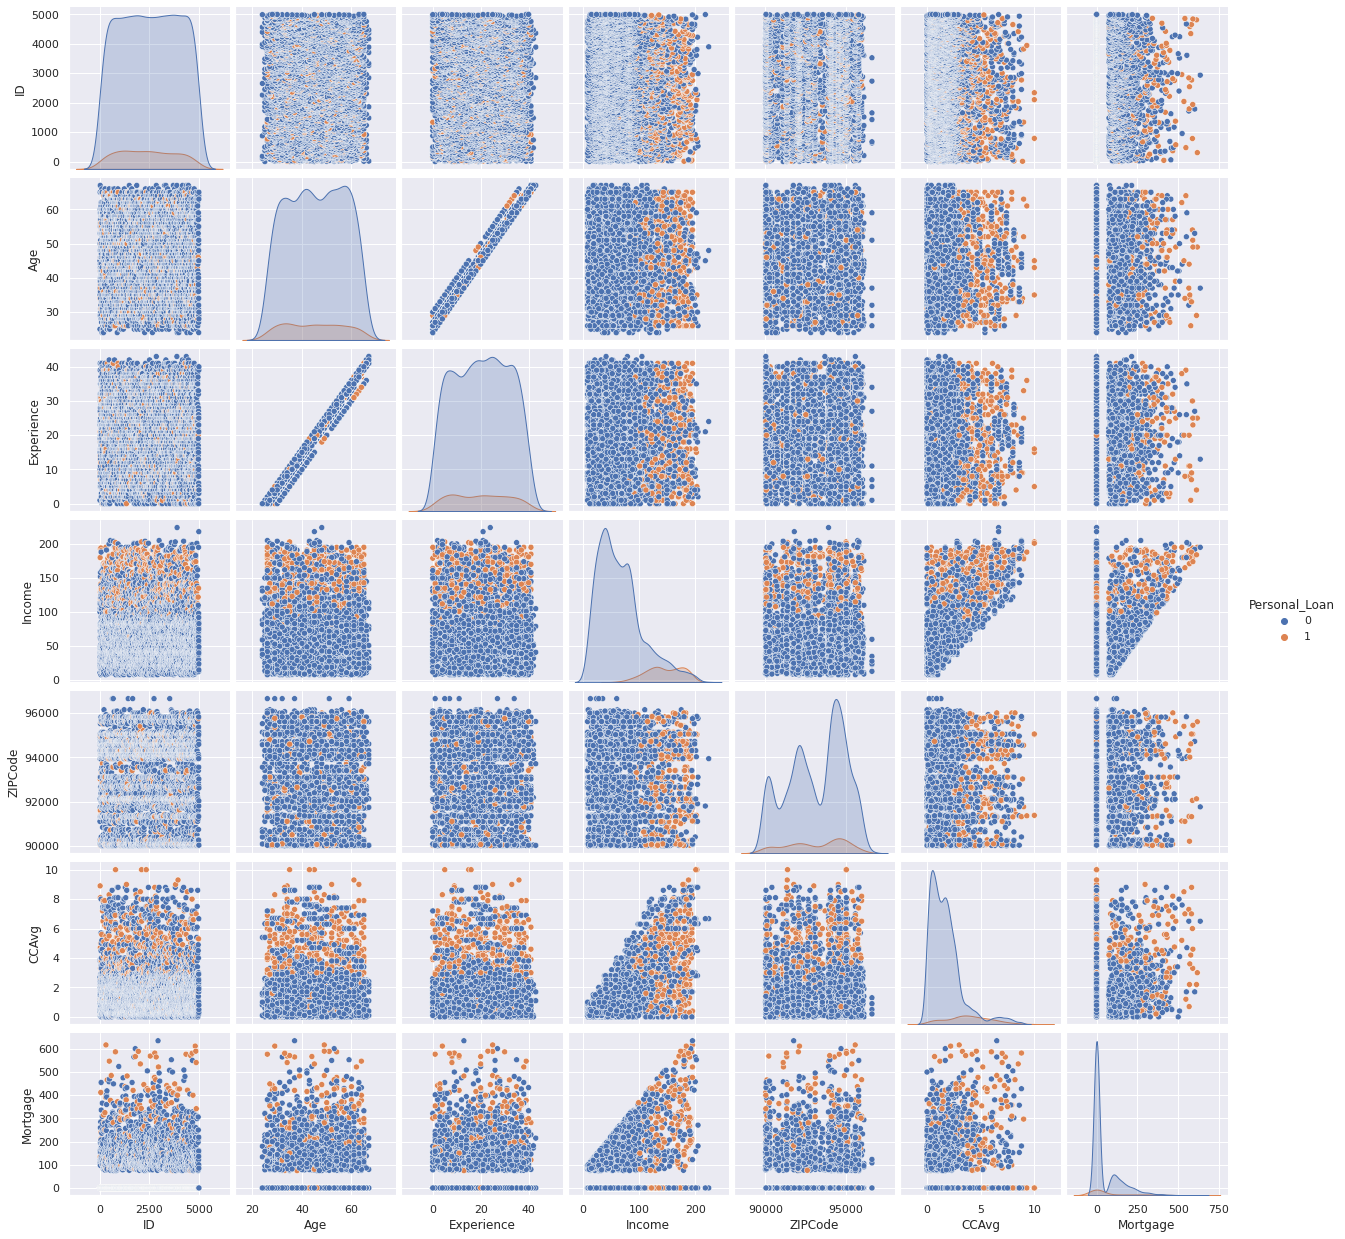

In [22]:
sns.pairplot(df, vars = continuous_cols, hue = 'Personal_Loan');  # pair plot

**Observation:**
- Experience and Age have high positive correlation. 
- CCAvg and Income have medium positive correlation.
- For customers with mortgage, income and mortgage are positively correlated.
- ID has no serious correlation with any other columns. It's really just a sequential index. We should drop it before the model building.

### Age vs Personal_Loan

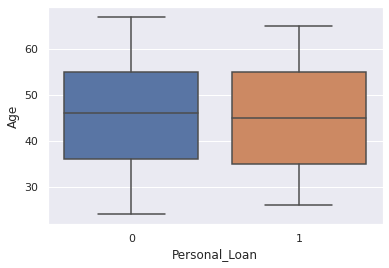

In [23]:
sns.boxplot(x = 'Personal_Loan', y = 'Age', data = df);

**Observation:** Age seems to make little difference in the acceptance of personal loan.

### Experience vs Personal_Loan

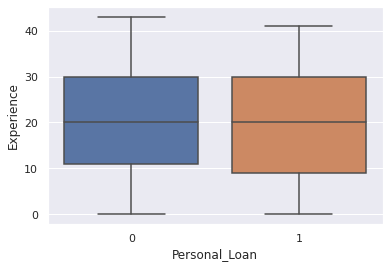

In [24]:
sns.boxplot(x = 'Personal_Loan', y = 'Experience', data = df);

**Observation:** Experience seems to make little difference in the acceptance of personal loan.

### Income vs Personal_Loan

In [25]:
df.groupby(['Personal_Loan'])['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Personal_Loan,,,,,,,,
0,4468.0,66.194270,40.610054,8.0,35.0,59.0,84.0,224.0
1,480.0,144.745833,31.584429,60.0,122.0,142.5,172.0,203.0


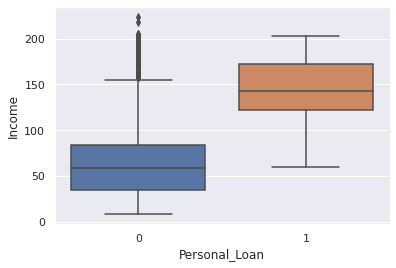

In [26]:
sns.boxplot(x = 'Personal_Loan', y = 'Income', data = df);

**Observation:** People accepting the loan have higher income. The group rejecting the loan has some outliers on the upper end.

### CCAvg vs Personal_Loan

In [27]:
df.groupby(['Personal_Loan'])['CCAvg'].describe()

,count,mean,std,min,25%,50%,75%,max
Personal_Loan,,,,,,,,
0,4468.0,1.724349,1.565008,0.0,0.6,1.4,2.3000,8.8
1,480.0,3.905354,2.097681,0.0,2.6,3.8,5.3475,10.0


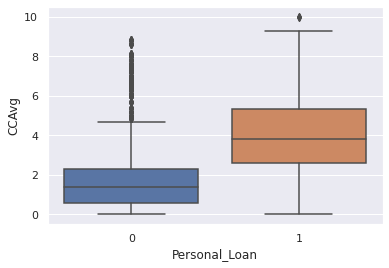

In [28]:
sns.boxplot(x = 'Personal_Loan', y = 'CCAvg', data = df);

**Observation:** Customers accepting the loan spend more on credit cards per month. Both groups have outliers on the upper end.

### Mortgage vs Personal_Loan

In [29]:
df["Mortgage_Paidoff"] = (df.Mortgage == 0)   # add a column Mortgage_paidoff to df
pd.crosstab(index = df['Mortgage_Paidoff'], columns = df['Personal_Loan']).sort_values(by = 1, ascending = False)

Personal_Loan,0,1
Mortgage_Paidoff,,
True,3110,312
False,1358,168


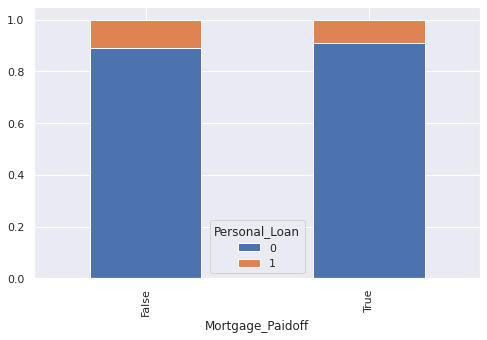

In [30]:
pd.crosstab(index = df['Mortgage_Paidoff'], columns = df['Personal_Loan'], normalize = 'index').plot(kind = 'bar', stacked = True, figsize = (8,5));

**Observation:** The conversion rate between mortgage paid off group and non-paid off group are similar.

In [31]:
df[df.Mortgage > 0].groupby(['Personal_Loan'])['Mortgage'].describe()    # only records with mortgage balance > 0

,count,mean,std,min,25%,50%,75%,max
Personal_Loan,,,,,,,,
0,1358.0,170.707658,87.201074,75.0,106.0,146.0,211.00,635.0
1,168.0,288.130952,141.145466,75.0,174.0,282.0,373.25,617.0


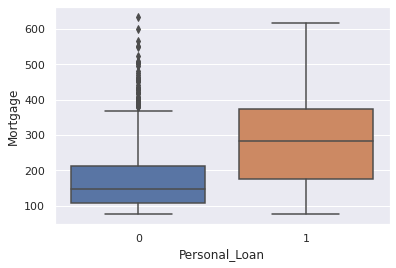

In [32]:
sns.boxplot(x = 'Personal_Loan', y = 'Mortgage', data = df[df.Mortgage > 0]);

**Observation:** For customers with mortgage, those with higher balance are more likely to accept the loan.

### Family vs Personal_Loan

In [33]:
pd.crosstab(index = df['Family'], columns = df['Personal_Loan']).sort_values(by = 1, ascending = False)

Personal_Loan,0,1
Family,,
4,1069,134
3,868,133
1,1363,107
2,1168,106


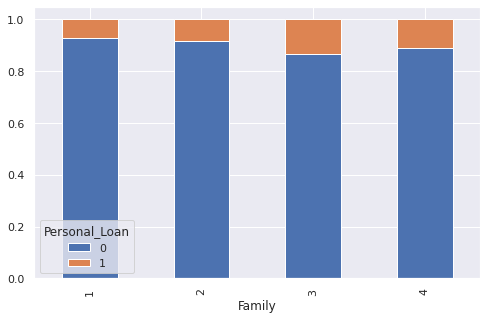

In [34]:
pd.crosstab(index = df['Family'], columns = df['Personal_Loan'], normalize = 'index').plot(kind = 'bar', stacked = True, figsize = (8,5));

**Observation:** Customers of family size of 3 or 4 are more likely to accept the loan.

### Online vs Personal_Loan

In [35]:
pd.crosstab(index = df['Online'], columns = df['Personal_Loan']).sort_values(by = 1, ascending = False)

Personal_Loan,0,1
Online,,
1,2663,291
0,1805,189


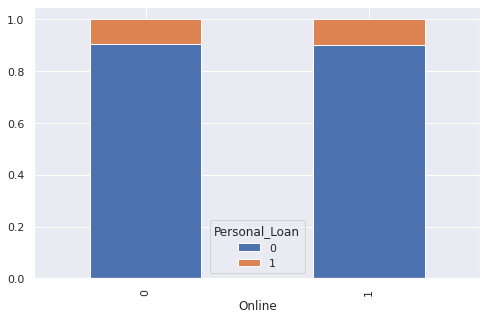

In [36]:
pd.crosstab(index = df['Online'], columns = df['Personal_Loan'], normalize = 'index').plot(kind = 'bar', stacked = True, figsize = (8,5));

**Observation:** Though the absolute number of borrowers in the online banking group is bigger, the conversion rate doesn't differ much compared to the other group.

### CD_Account vs Personal_Loan

In [37]:
pd.crosstab(index = df['CD_Account'], columns = df['Personal_Loan']).sort_values(by = 1, ascending = False)

Personal_Loan,0,1
CD_Account,,
0,4306,340
1,162,140


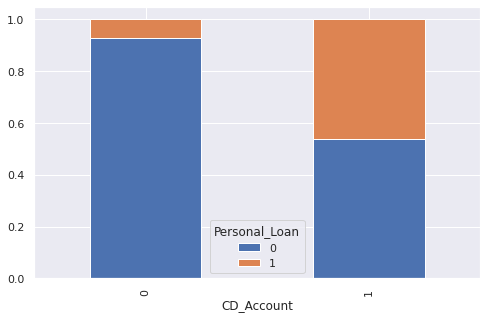

In [38]:
pd.crosstab(index = df['CD_Account'], columns = df['Personal_Loan'], normalize = 'index').plot(kind = 'bar', stacked = True, figsize = (8,5));

**Observation:** Customers with a certificate of deposit (CD) account with the bank are much more likely to be borrowers.

### Securities_Account vs Personal_Loan

In [39]:
pd.crosstab(index = df['Securities_Account'], columns = df['Personal_Loan']).sort_values(by = 1, ascending = False)

Personal_Loan,0,1
Securities_Account,,
0,4012,420
1,456,60


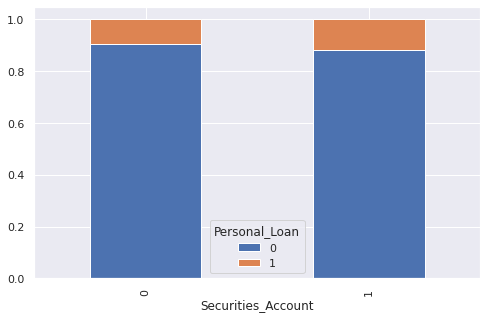

In [40]:
pd.crosstab(index = df['Securities_Account'], columns = df['Personal_Loan'], normalize = 'index').plot(kind = 'bar', stacked = True, figsize = (8,5));

**Observation:** Customers having securities account with the bank are slightly more likely to be borrowers.

### CreditCard vs Personal_Loan

In [41]:
pd.crosstab(index = df['CreditCard'], columns = df['Personal_Loan']).sort_values(by = 1, ascending = False)

Personal_Loan,0,1
CreditCard,,
0,3156,337
1,1312,143


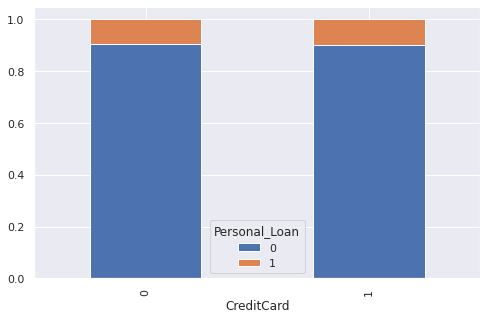

In [42]:
pd.crosstab(index = df['CreditCard'], columns = df['Personal_Loan'], normalize = 'index').plot(kind = 'bar', stacked = True, figsize = (8,5));

**Observation:** Whether having a credit card issued by any other Bank makes little difference in loan acceptance.

### Education vs Personal_Loan

In [43]:
pd.crosstab(index = df['Education'], columns = df['Personal_Loan']).sort_values(by = 1, ascending = False)

Personal_Loan,0,1
Education,,
3,1276,205
2,1205,182
1,1987,93


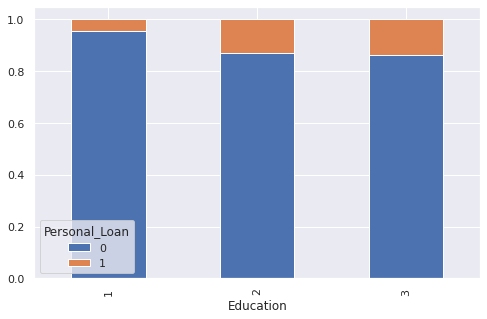

In [44]:
pd.crosstab(index = df['Education'], columns = df['Personal_Loan'], normalize = 'index').plot(kind = 'bar', stacked = True, figsize = (8,5));

**Observation:** Customer with higher education is more likely to apply for personal loan.

### ZIPCode vs Personal_Loan

In [45]:
zipcode_cr = pd.crosstab(index = df.ZIPCode, columns = df.Personal_Loan)

print("Out of " + str(zipcode_cr.shape[0]) + " zip codes, " + str(len(zipcode_cr[zipcode_cr[1] > 0])) + " have sucessful conversion.") 

Out of 467 zip codes, 238 have sucessful conversion.


**Observation:** As we see, this dataset includes 467 zip codes. Only half have successful experience in converting depositors into borrowers in the last campaign.

In [46]:
zipcode_cr = zipcode_cr[zipcode_cr[1] > 0]  # only include zip codes with borrowers
zipcode_cr.rename(columns = {1: "Borrowers", 0: "Non_Borrowers"}, inplace = True)  # rename columns
zipcode_cr['Conversion_Rate_by_ZipCode'] = 100 * zipcode_cr["Borrowers"] / (zipcode_cr["Borrowers"] + \
                                                                            zipcode_cr["Non_Borrowers"])  # compute conversion rate
zipcode_cr.reset_index(inplace = True)
zipcode_cr.head()

Personal_Loan,ZIPCode,Non_Borrowers,Borrowers,Conversion_Rate_by_ZipCode
0,90016,1,1,50.000000
1,90019,4,1,20.000000
2,90024,49,1,2.000000
3,90025,17,2,10.526316
4,90027,2,1,33.333333


In [47]:
print("Highest conversion rate:", round(zipcode_cr.Conversion_Rate_by_ZipCode.max(), 2), "%")
print("Lowest conversion rate:", round(zipcode_cr.Conversion_Rate_by_ZipCode.min(), 2), "%")

Highest conversion rate: 66.67 %
Lowest conversion rate: 2.0 %


**Observation:** Among these 238 zip codes, conversion rate range from 2% to 66%. 

{'Bella Vista',
 'Berkeley',
 'Los Angeles',
 'Oak View',
 'Oceanside',
 'Pasadena',
 'San Diego',
 'San Francisco',
 'San Jose'}

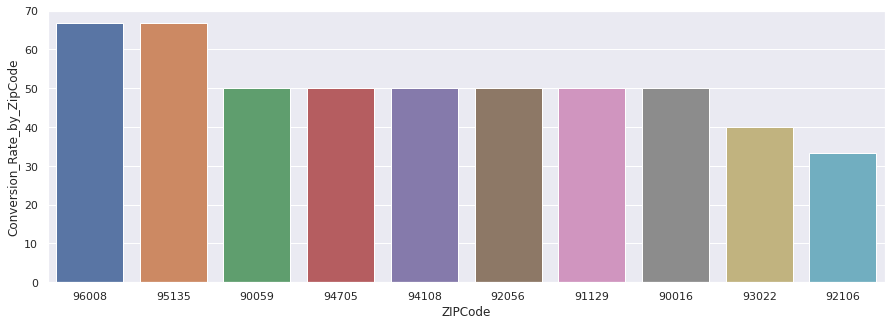

In [48]:
plt.figure(figsize = (15,5));
top10_cr =  zipcode_cr.sort_values(by = 'Conversion_Rate_by_ZipCode', ascending = False).head(10) # top 10 zip codes with the highest conversion rate
sns.barplot(x = 'ZIPCode', y = 'Conversion_Rate_by_ZipCode', data = top10_cr, order = top10_cr.ZIPCode); 

city = []   # the cities these zip code belong to
for zipcode in top10_cr.ZIPCode:
    city.append(zc[zipcode].city)
    
set(city)

{'Berkeley',
 'Davis',
 'La Jolla',
 'Los Altos',
 'Los Angeles',
 'Palo Alto',
 'San Diego',
 'Santa Clara',
 'Stanford'}

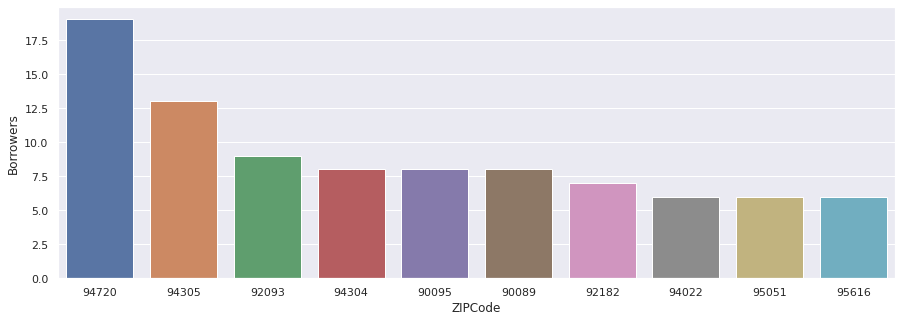

In [49]:
plt.figure(figsize = (15,5));
top10_number = zipcode_cr.sort_values(by = "Borrowers", ascending = False).head(10)   # top 10 zip codes with the highest number of borrowers
sns.barplot(x = 'ZIPCode', y = 'Borrowers', data = top10_number, order = top10_number.ZIPCode); 

city = []    # the cities these zip code belong to
for zipcode in top10_number.ZIPCode:
    city.append(zc[zipcode].city)
    
set(city)

**Observation:** 
- Some zipcodes such as 96008 and 95135 gain more than 66% conversion rate. On the other hand, 229 zip codes have zero conversion rate.
- The zip code with the highest number of borrowers is 94720. 
- The cities these zip codes belong to are either city with large populations, or city with lots of high income residents, or college towns.

### City vs Personal_Loan

In [50]:
city_cr = pd.crosstab(index = df.City, columns = df.Personal_Loan)
print("Out of " + str(city_cr.shape[0]) + " cities, " + str(len(city_cr[city_cr[1] > 0])) + " have sucessful conversion.") 

Out of 242 cities, 141 have sucessful conversion.


In [51]:
city_cr = city_cr[city_cr[1] > 0]  # only include those with borrowers
city_cr.rename(columns = {1: "Borrowers", 0: "Non_Borrowers"}, inplace = True)  # rename columns
city_cr["Conversion_Rate_by_City"] = 100 * city_cr["Borrowers"] / (city_cr["Borrowers"] + city_cr["Non_Borrowers"])  # compute conversion rate
city_cr.reset_index(inplace = True)
city_cr.head()

Personal_Loan,City,Non_Borrowers,Borrowers,Conversion_Rate_by_City
0,Alameda,24,2,7.692308
1,Arcadia,9,1,10.000000
2,Arcata,25,1,3.846154
3,Bakersfield,15,3,16.666667
4,Banning,5,2,28.571429


In [52]:
print("Highest conversion rate:", round(city_cr.Conversion_Rate_by_City.max(), 2), "%")
print("Lowest conversion rate:", round(city_cr.Conversion_Rate_by_City.min(), 2), "%")

Highest conversion rate: 66.67 %
Lowest conversion rate: 2.94 %


**Observation:** Conversion rate range from 3% - 66%.

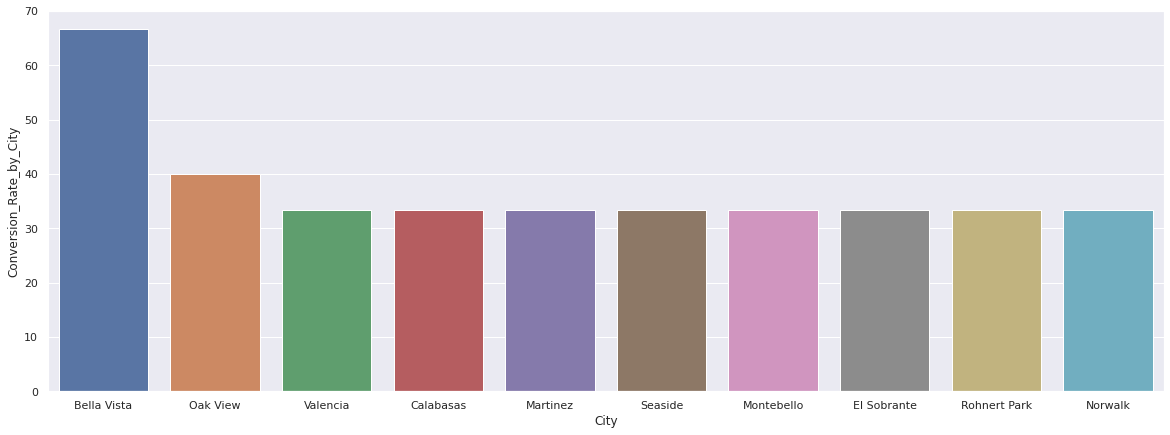

In [53]:
plt.figure(figsize = (20,7));
top10_cr =  city_cr.sort_values(by = 'Conversion_Rate_by_City', ascending = False).head(10) # top 10 cities with the highest conversion rate
sns.barplot(x = 'City', y = 'Conversion_Rate_by_City', data = top10_cr, order = top10_cr.City);

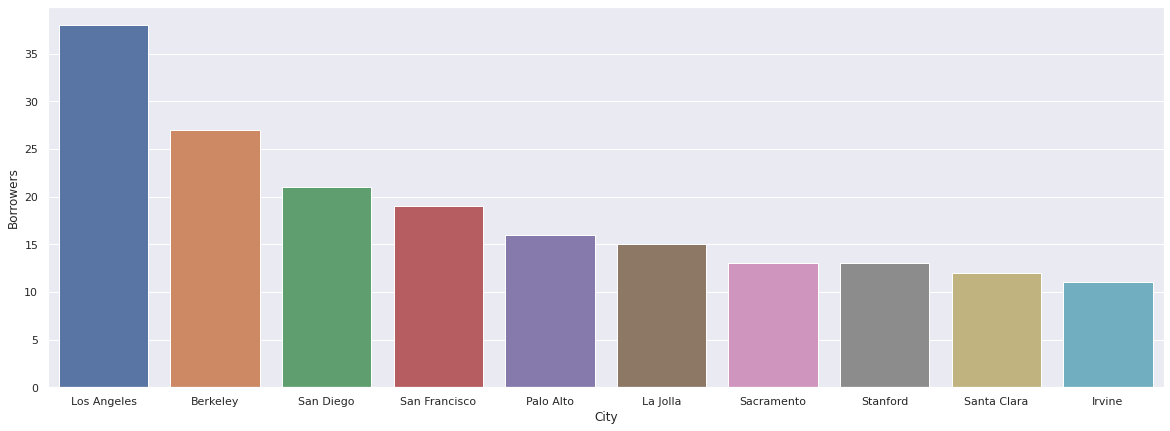

In [54]:
plt.figure(figsize = (20,7));
top10_number = city_cr.sort_values(by = "Borrowers", ascending = False).head(10)   # top 10 cities with the highest number of borrowers
sns.barplot(x = 'City', y = 'Borrowers', data = top10_number, order = top10_number.City); 

**Observation:** 
- The city with highest conversion rate is Bella Vista, followed by Oak View and Valencia. 
- The city that contributes the most borrowers is Los Angeles, followed by Berkeley and San Diego.
- Compare these two lists, we can see that cities with large number of borrowers are those with large population and high income. However their conversion rate is not very high. In contrast, small citis get very high conversion rate due to less customers.

## Data Pre-processing

### Drop ID column

In [55]:
df.drop('ID', axis = 1, inplace = True)

### Outlier Treatment

As the EDA shows, Income, CCAvg and Mortgage have outliers. In order to get a more robust model, need to complete outlier treatment before model building. However, As there're a lot of zeros in Mortgage, most important information may be removed after outlier treatment and thus we end up with all zeros. Therefore, we had better just do outlier treatment to Income and CCAvg.

In [56]:
def outlier_treatment(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    return df[col].clip(lower = q1 - 1.5 * IQR, upper = q3 + 1.5 * IQR )

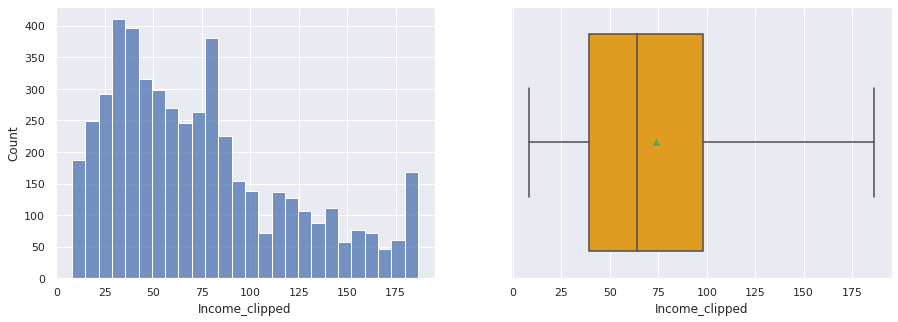

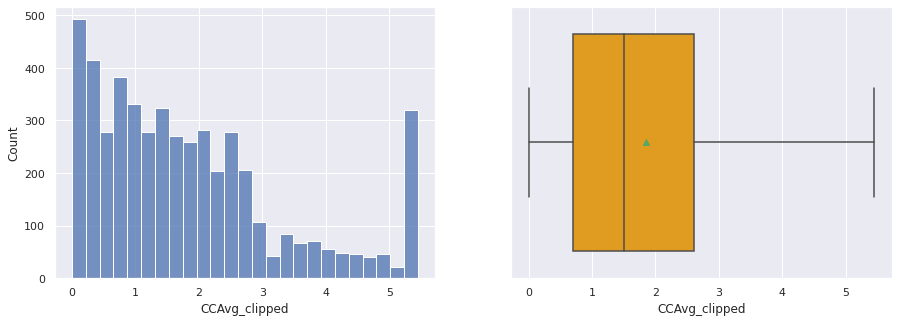

In [57]:
for col in ['Income', 'CCAvg']:     # add two clipped columns to df
    clipped_col = col + "_clipped"
    df[clipped_col] = outlier_treatment(col)
    plt.figure(figsize = (15,5))
    plt.subplot(1,2,1)
    sns.histplot(df[clipped_col]);
    plt.subplot(1,2,2)
    sns.boxplot(x = clipped_col, data = df,color = 'orange', showmeans = True);

## Logistic Regression

### Test Assumptions

- Before applying logistic regression model, use variance inflation factor (VIF) to test the multicollinearity of independent variables. 
- Variance Inflation factor: Variance inflation factors measure the inflation in the variances of the regression coefficients estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient βk is “inflated”by the existence of correlation among the predictor variables in the model.
- General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and hence the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use.

In [58]:
X = df.drop(["Personal_Loan", "Mortgage_Paidoff", "Income", "CCAvg", "City", "State"], axis = 1)
y = df['Personal_Loan']

In [59]:
num_feature_set = X.copy()
num_feature_set = add_constant(num_feature_set)
num_feature_set = num_feature_set.astype(float)
pd.DataFrame([variance_inflation_factor(num_feature_set.values, i) for i in range(num_feature_set.shape[1])], 
             index = num_feature_set.columns, columns = ["VIF"])

,VIF
const,3280.668506
Age,91.696036
Experience,91.564083
ZIPCode,1.004540
Family,1.033060
Education,1.111969
Mortgage,1.051444
Securities_Account,1.139173
CD_Account,1.335715
Online,1.040057


**Observation:** High multicollinearity presents between Age and Experience, as we already see in EDA.

Let's drop the Age column from predictors.

In [60]:
X = X.drop("Age", axis = 1)

### Split training set and testing set

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)
print("X_train size: ", X_train.shape)
print("X_test size: ", X_test.shape)
print("y_train size: ", y_train.shape)
print("y_test size: ", y_test.shape)

X_train size:  (3463, 11)
X_test size:  (1485, 11)
y_train size:  (3463,)
y_test size:  (1485,)


In [62]:
X_train.head()

,Experience,ZIPCode,Family,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Income_clipped,CCAvg_clipped
3091,32,95020,3,3,158,0,0,0,1,42.0,1.4
3623,3,91105,4,2,95,0,0,0,0,45.0,1.7
3424,19,94539,4,2,0,0,0,1,1,45.0,0.0
3444,35,93101,1,1,0,0,0,1,0,128.0,0.9
2117,7,91380,3,3,0,0,0,1,0,15.0,0.9


### Model building and evaluation

In [63]:
def compute_metrics(model, X_train, X_test, y_train, y_test, threshold = 0.5):
    """
    This function is to compute accuracy, precision, recall and f1 score for both training set and test set
    
    Input:
    model: model before fitting.
    X_train: independent variables of training set. Dimension: (m, k).
    y_train: true class labels of training set. Dimension: (m, ).    
    X_test: independent variables of test set. Dimension: (n, k).
    y_test: true class labels of test set. Dimension: (n, ). 
    threshold: the threshold value at which a probability estimate is identified as class 1.
    
    Return:
    A model fitted with training set. Predictions and a dataframe of metrics for both training and test set.
    """    
    model = model.fit(X_train, y_train)
    
    if threshold == 0.5:    
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
    else:
        y_pred_train = model.predict_proba(X_train)[:,1]
        y_pred_train = (y_pred_train > threshold).astype('int')        
        y_pred_test = model.predict_proba(X_test)[:,1]
        y_pred_test = (y_pred_test > threshold).astype('int')

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    
    precision_train = precision_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)
    
    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    
    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)
    
    metrics_df = pd.DataFrame([[accuracy_train, precision_train, recall_train, f1_train],
                                                  [accuracy_test, precision_test, recall_test, f1_test]    ], 
                                                  columns = ["Accuracy", "Precision", "Recall", "F1 score"], index = ["training set", "test set"])
    
    return model, y_pred_train, y_pred_test, metrics_df
    

In [64]:
def generate_confusion_matrix(y_true, y_pred, labels = [0, 1]):
    """
    This function is to plot the confusion matrix as a heatmap.
    
    Input:
    y_true: true class labels.
    y_pred: predicted class labels.
    labels: a list of class labels.
    
    Return:
    None.
    """
    matrix = confusion_matrix(y_true, y_pred, labels = labels)  # return a n_class x n_class ndarray, i-th row and j-th column entry 
                                                                                                 # indicates the number of samples with true label being i-th class 
                                                                                                 # and predicted label being j-th class.
    matrix_df = pd.DataFrame(matrix)
    
    group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]   # absolute value
    group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]    # percent
    plot_labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
    plot_labels = np.asarray(plot_labels).reshape(2,2)   # reshape into a n_class x n_class ndarray
    
    plt.figure(figsize = (7,5))
    sns.heatmap(matrix_df, annot = plot_labels, fmt='')
    plt.xlabel('Predicted Value')
    plt.ylabel('True Value')

In [65]:
def show_ROC_curve(model, X, y_true, title):
    """
    This function is to compute the roc_auc_score and plot ROC curve.
    
    Input:
    model: a model fitted with training set.
    X: independent variables.
    y_true: true class labels of dependent variable.
    title: "Training set" or "Test set".
    
    Return:
    False positive rate, true positive rate and the corresponding thresholds for the given model and given dataset.
    """
    y_score = model.predict_proba(X)[:,1]   # probability estimates for class 1
    score = roc_auc_score(y_true, y_score)
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    plt.figure(figsize = (5,5))
    plt.plot([0,1],[0,1], 'r--')
    plt.plot(fpr, tpr, 'b--')
    plt.xlim(-0.01,1.01)
    plt.ylim(-0.01,1.01)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title + ' AUC: ' + str(score))
    return fpr, tpr, thresholds

In [66]:
def precision_recall_accuracy_threshold_plot(model, X, y_true):
    """
    This function is to plot the accuracy, precision and recall against thresholds.
    
    Input:
    model: a model fitted with training set.
    X: independent variables.
    y_true: true class labels of dependent variable.
    
    Return:
    None.
    """
    y_score = model.predict_proba(X_test)[:,1]   # probability estimates for class 1
    precision, recall, thresholds = precision_recall_curve(y_true, y_score)
    
    accuracy = []
    for t in thresholds:
        accuracy.append(accuracy_score(y_true, (y_score > t)))
    
    plt.figure(figsize = (7,5))
    plt.plot(thresholds, accuracy, 'r--', label='Accuracy')    
    plt.plot(thresholds, recall[:-1], 'g--', label = 'Recall')
    plt.plot(thresholds, precision[:-1], 'm--', label = 'Precision')
    plt.legend(loc = 'lower left')
    plt.xlabel('Thresholds')
    plt.ylim(0,1.01)

In [67]:
def show_coefficient_intercept(model, feature_names):
    """
    This function is to show the dataframe of model coefficients and intercept.
    
    Input:
    model: a model fitted with training set.
    feature_name: a list of names of independent variables.
    
    Return:
    A dataframe.
    """
    coefficient_df = pd.DataFrame({"coefficient": model.coef_[0].T}, index = feature_names)
    coefficient_df.loc["intercept"] = model.intercept_
    return coefficient_df

In [68]:
lg = LogisticRegression(random_state = 10, solver = 'liblinear')    # loogistic regression model

In [69]:
lg_1, y1_train, y1_test, metrics_1 = compute_metrics(lg, X_train, X_test, y_train, y_test)
print("Logistic regression model with threshold 0.5")
metrics_1

Logistic regression model with threshold 0.5


,Accuracy,Precision,Recall,F1 score
training set,0.910193,0.553922,0.339339,0.420857
test set,0.900337,0.494737,0.319728,0.388430


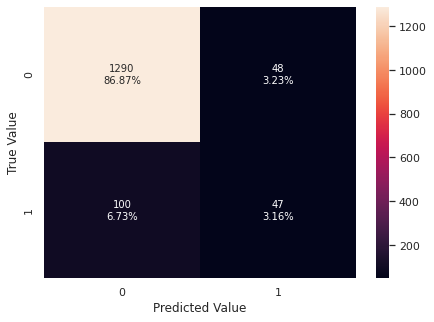

In [70]:
generate_confusion_matrix(y_test, y1_test)   # confusion matrix for test set

**Observation:** We get very high accuracy for both training set and test set, which are greater than 0.9. But considering our objective is to identify whether a liability customer will buy a personal loan or not, we need to identify as many potential borrowers as possible. In this case, recall is a better metric. Recall for training set and test set is about 0.3. We need to improve the model to get a higher recall score.

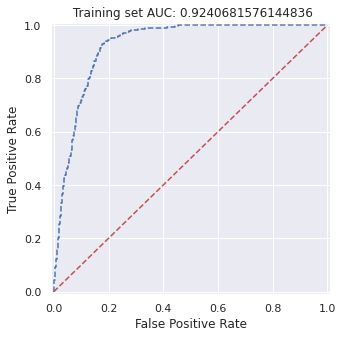

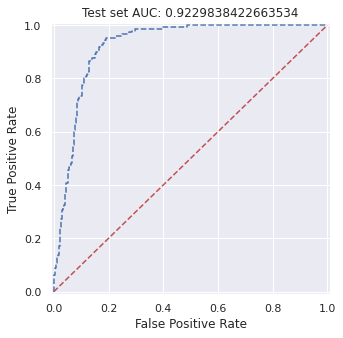

In [71]:
fpr, tpr, thresholds = show_ROC_curve(lg_1, X_train, y_train, " Training set")   # ROC curve for training set
fpr, tpr, thresholds = show_ROC_curve(lg_1, X_test, y_test, "Test set")   # ROC curve for test set

**Observation:** AUC are more than 0.9, which shows high ability to distinguish between classes. We may be able to adjust the threshold to get a better recall score.

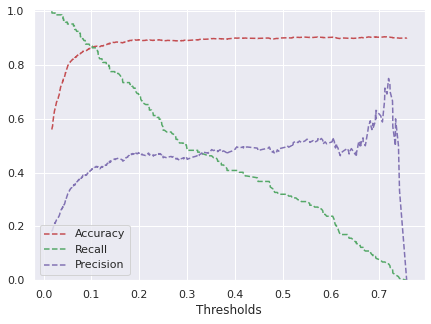

In [72]:
precision_recall_accuracy_threshold_plot(lg_1, X_test, y_test)  # accuracy, precision score and recall score against threshold for test set

**Observation:** Accuracy and precision plateau after threshold = 0.2. Precision curve and recall curve intersect at about threshold = 0.34.

### Model improvement and evaluation

In [73]:
idx = np.argmax(tpr - fpr)   # the index for optimal threshold
optimal_threshold = thresholds[idx]
print("optimal threshold: " + str(optimal_threshold))

optimal threshold: 0.062427032779968056


In [74]:
lg_2, y2_train, y2_test, metrics_2 = compute_metrics(lg, X_train, X_test, y_train, y_test, optimal_threshold)
print("Logistic regression model with threshold " + str(optimal_threshold))
metrics_2

Logistic regression model with threshold 0.062427032779968056


,Accuracy,Precision,Recall,F1 score
training set,0.810858,0.330526,0.942943,0.489478
test set,0.821549,0.351010,0.945578,0.511971


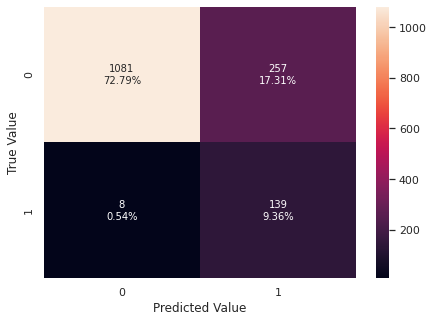

In [75]:
generate_confusion_matrix(y_test, y2_test)   # confusion matrix for test set

**Observation:** After updating the threshold to optimal threshold, recall is now greater than 0.9 for both training set and test set. Accuracy is greater than 0.8, still a desirable result.

In [76]:
log_coefficient = show_coefficient_intercept(lg_2, X_train.columns)
log_coefficient

,coefficient
Experience,0.003896
ZIPCode,-0.000070
Family,0.015432
Education,0.017777
Mortgage,0.000601
Securities_Account,0.001274
CD_Account,0.004875
Online,0.000449
CreditCard,0.000108
Income_clipped,0.038089


**Observation:** Only ZIPCode and intercept are negative. Others coefficients are positive.

Let's see how 1 unit of each feature changes will affect the odds ratio.

In [77]:
coefficient_percent = log_coefficient.apply(lambda x: (np.exp(x) - 1) * 100, axis = 1)
coefficient_percent.rename(columns = {"coefficient": "% of change on odds"}, inplace = True)
coefficient_percent.sort_values(by = "% of change on odds", ascending = False)

,% of change on odds
Income_clipped,3.882368
Education,1.793605
Family,1.555183
CCAvg_clipped,1.072095
CD_Account,0.488710
Experience,0.390331
Securities_Account,0.127498
Mortgage,0.060162
Online,0.044894
CreditCard,0.010792


**Observation:** It shows Income is the most important factor, followed by education level, family size and monthly spending on credit card. Since they're all positive, it means the increase in these features will lead to increase in chances of an individual accept a personal loan offer. It matches what we see in the EDA.

## Decision Tree

Unlike regression model, desicion tree makes no assumptions on relationships between features, and thus it is immune to multicollinearity.

### Split training set and testing set

In [78]:
X = df.drop(["Personal_Loan","Income", "CCAvg", "City", "State", "Mortgage_Paidoff"], axis = 1)
y = df['Personal_Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)
print("X_train size: ", X_train.shape)
print("X_test size: ", X_test.shape)
print("y_train size: ", y_train.shape)
print("y_test size: ", y_test.shape)

X_train size:  (3463, 12)
X_test size:  (1485, 12)
y_train size:  (3463,)
y_test size:  (1485,)


In [79]:
X_train.head()

,Age,Experience,ZIPCode,Family,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Income_clipped,CCAvg_clipped
3091,58,32,95020,3,3,158,0,0,0,1,42.0,1.4
3623,28,3,91105,4,2,95,0,0,0,0,45.0,1.7
3424,44,19,94539,4,2,0,0,0,1,1,45.0,0.0
3444,60,35,93101,1,1,0,0,0,1,0,128.0,0.9
2117,31,7,91380,3,3,0,0,0,1,0,15.0,0.9


### Model Building and Evaluation

In [80]:
dt = DecisionTreeClassifier(random_state = 10)  # use default setting
dt_1, y1_train, y1_test, metrics_1 = compute_metrics(dt, X_train, X_test, y_train, y_test)
print("Decision tree model with default setting")
metrics_1

Decision tree model with default setting


,Accuracy,Precision,Recall,F1 score
training set,1.000000,1.000000,1.000000,1.000000
test set,0.981145,0.921986,0.884354,0.902778


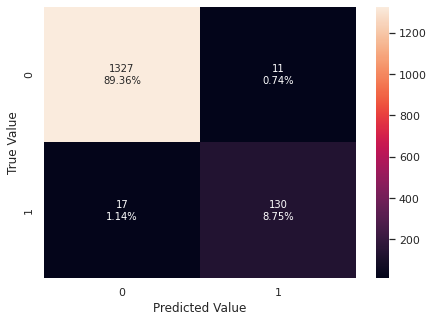

In [81]:
generate_confusion_matrix(y_test, y1_test)   # confusion matrix for test set

**Observation:** The model is overfit with training set. But we still get good accuracy score of 0.98 and decent recall score of 0.88 for test set. 

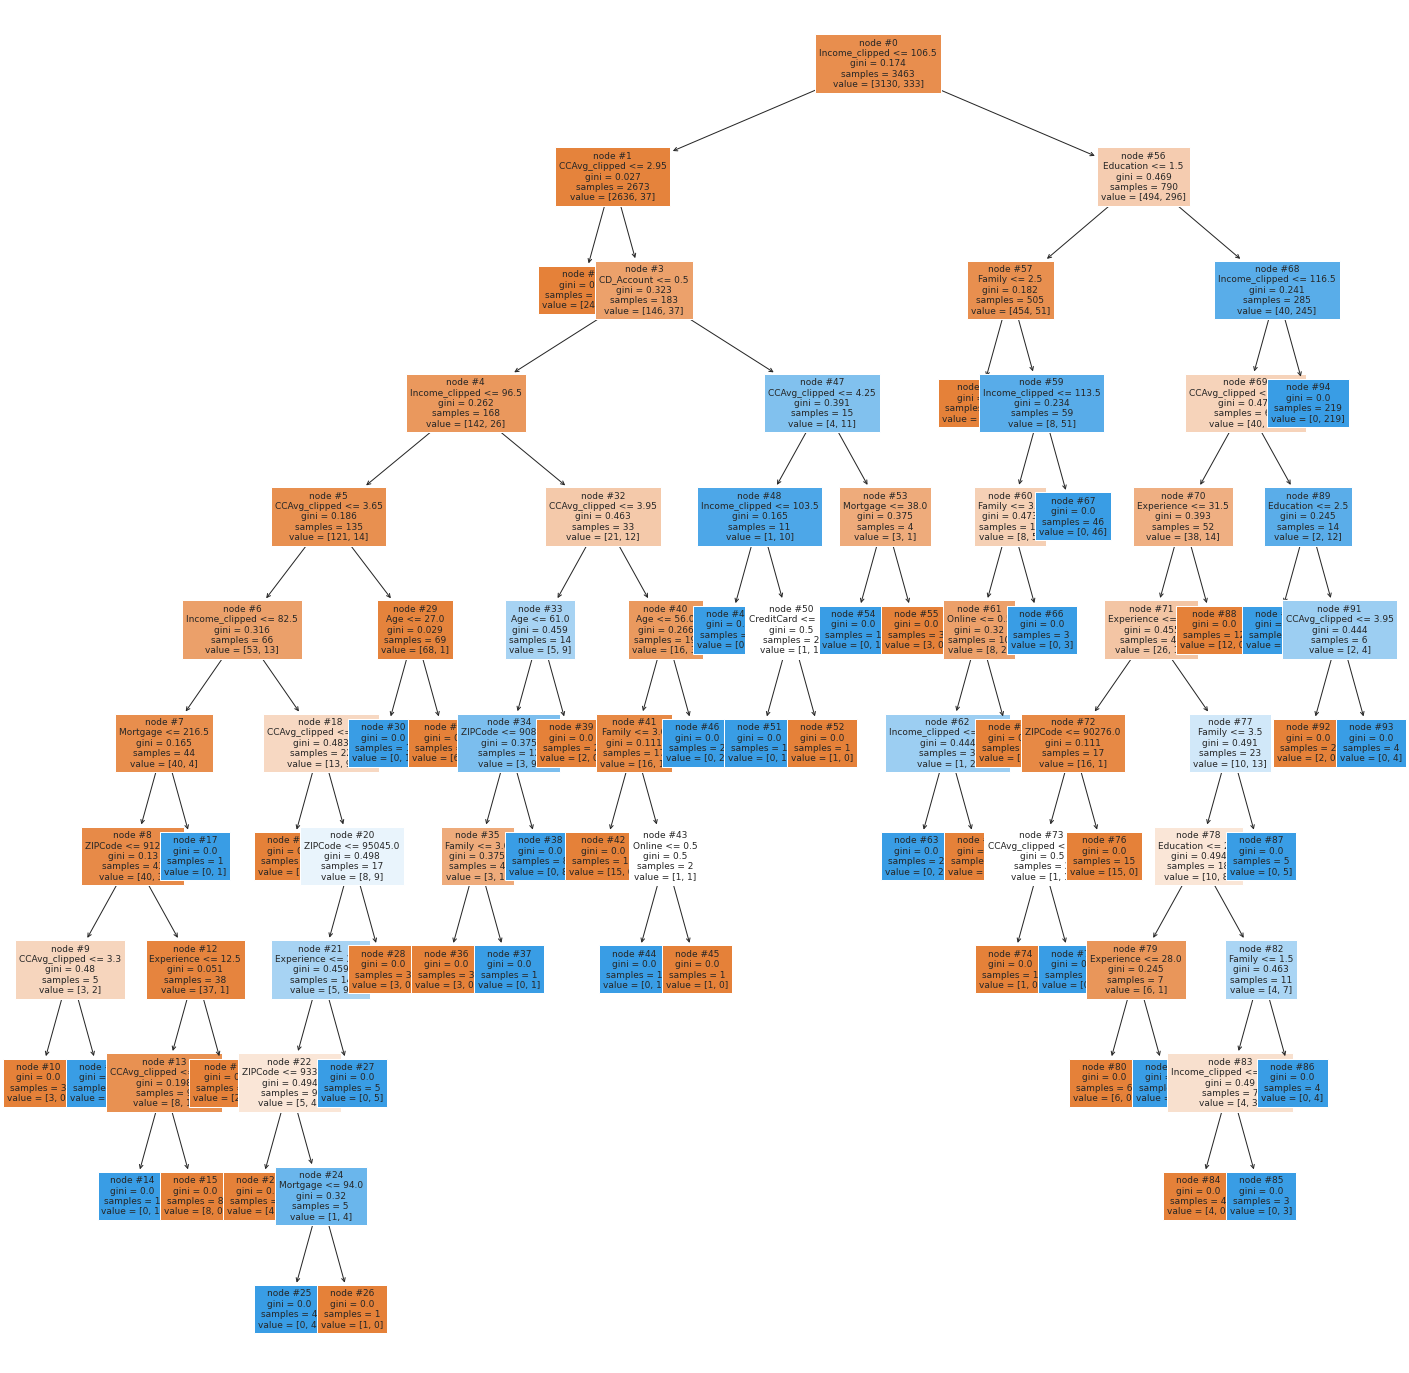

In [82]:
plt.figure(figsize = (25,25));
tree.plot_tree(dt_1, feature_names = X_train.columns.to_list(), filled = True, node_ids = True, fontsize = 9); 

In [83]:
print(tree.export_text(dt_1, feature_names = X_train.columns.to_list()))

|--- Income_clipped <= 106.50
|   |--- CCAvg_clipped <= 2.95
|   |   |--- class: 0
|   |--- CCAvg_clipped >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income_clipped <= 96.50
|   |   |   |   |--- CCAvg_clipped <= 3.65
|   |   |   |   |   |--- Income_clipped <= 82.50
|   |   |   |   |   |   |--- Mortgage <= 216.50
|   |   |   |   |   |   |   |--- ZIPCode <= 91257.00
|   |   |   |   |   |   |   |   |--- CCAvg_clipped <= 3.30
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- CCAvg_clipped >  3.30
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- ZIPCode >  91257.00
|   |   |   |   |   |   |   |   |--- Experience <= 12.50
|   |   |   |   |   |   |   |   |   |--- CCAvg_clipped <= 3.25
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- CCAvg_clipped >  3.25
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Experience >  12.50
|

In [84]:
pd.DataFrame(data = dt_1.feature_importances_, index = X_train.columns, 
             columns = ["feature importance"]).sort_values(by = "feature importance", ascending = False)

,feature importance
Income_clipped,0.358599
Education,0.353118
Family,0.144998
CCAvg_clipped,0.066714
Experience,0.018511
ZIPCode,0.016617
CD_Account,0.015315
Age,0.011745
Mortgage,0.007960
Online,0.004762


**Observation:**
- The model is overfit with the training set. It is over complicated and hard to understand.
- It identifies Income is the most important factor, followed by education level, family size and monthly spending on credit card, that's the same as what we get from logistic regression model.

### Model Improvement With Hyperparameter Tuning

Decision tree does not perform well on imbalanced datasets. If class_weight is set to None, all classes are supposed to have weight 1. In this case, we have imbalanced classes that class 0: class 1 = 9:1, the minority class (class 1) plays a more important role. By assigning large weight to the moniority class which imposes more importance and higher impact on node purity, and small weight to the majority class, we want to turn the model into a class-weighted decision tree.

In [85]:
para = {
    "max_depth": np.arange(1, 20),
    "min_samples_split": np.arange(1, 15),
    "min_samples_leaf": np.arange(1, 10),
    "min_impurity_decrease": [0.1, 0.01, 0.001, 0.0001],
}

gs = GridSearchCV(DecisionTreeClassifier(class_weight = "balanced", random_state = 10) , param_grid = para, scoring = "recall", n_jobs = -1, cv = 4)
gs.fit(X_train, y_train)
gs.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       min_impurity_decrease=0.01, random_state=10)

In [86]:
dt_2, y2_train, y2_test, metrics_2 = compute_metrics(gs.best_estimator_, X_train, X_test, y_train, y_test)
print("Decision tree model with pre-pruning")
metrics_2

Decision tree model with pre-pruning


,Accuracy,Precision,Recall,F1 score
training set,0.932140,0.587814,0.984985,0.736251
test set,0.939394,0.621277,0.993197,0.764398


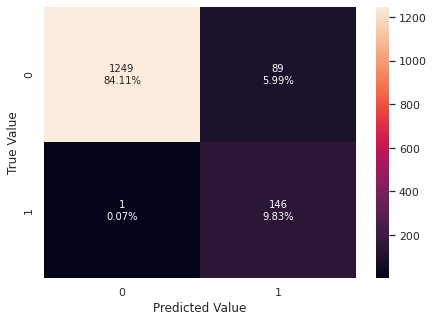

In [87]:
generate_confusion_matrix(y_test, y2_test)

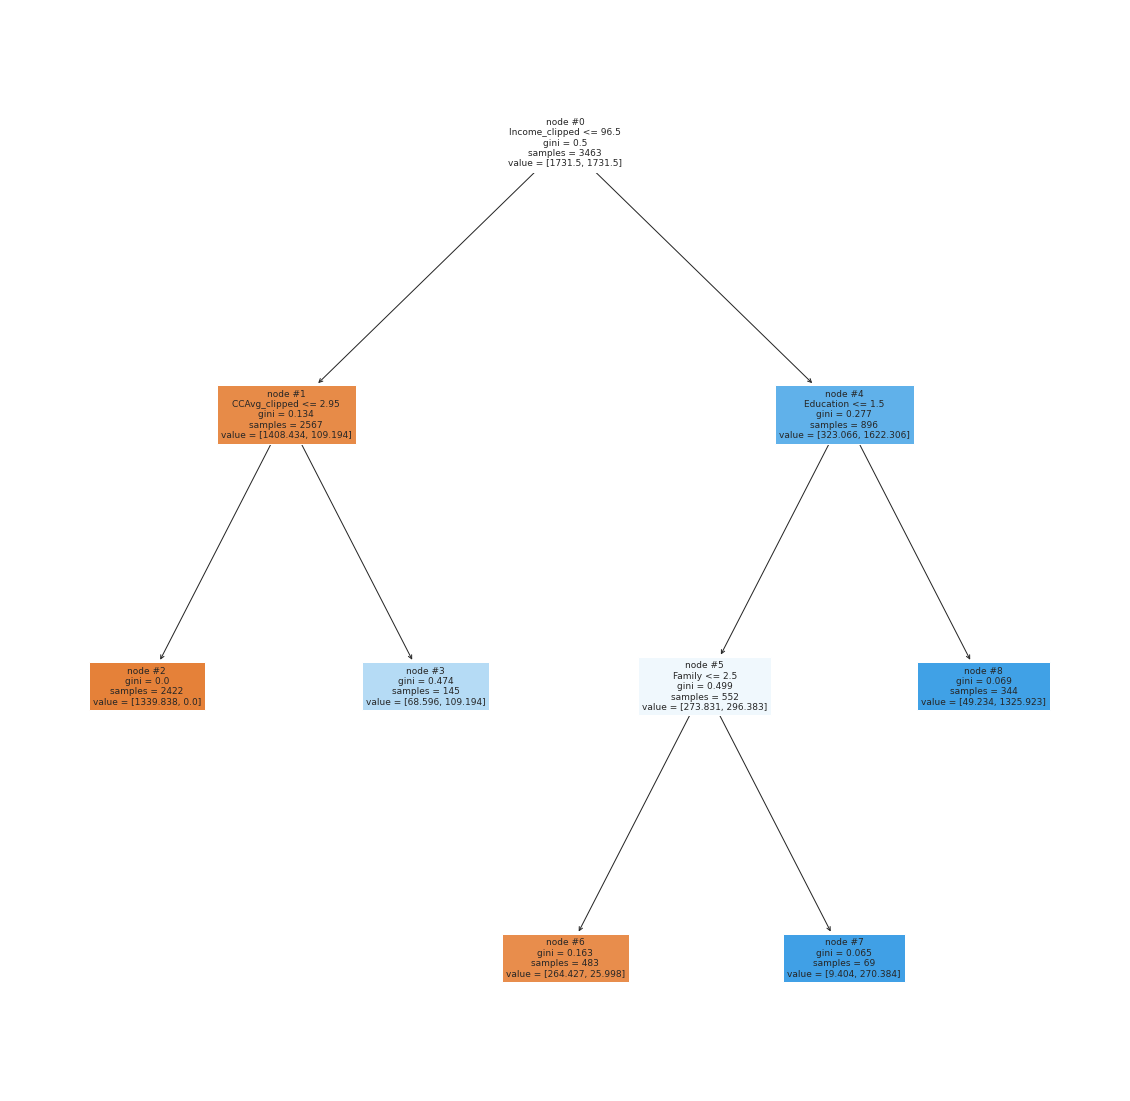

In [88]:
plt.figure(figsize = (20,20));
tree.plot_tree(dt_2, filled = True, feature_names = X_train.columns, node_ids = True, fontsize = 9); 

In [89]:
print(tree.export_text(dt_2, feature_names = X_train.columns.to_list()))

|--- Income_clipped <= 96.50
|   |--- CCAvg_clipped <= 2.95
|   |   |--- class: 0
|   |--- CCAvg_clipped >  2.95
|   |   |--- class: 1
|--- Income_clipped >  96.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- class: 0
|   |   |--- Family >  2.50
|   |   |   |--- class: 1
|   |--- Education >  1.50
|   |   |--- class: 1



**Observation:** 
- The tree becomes a bit oversimplified: the max depth decreases from 11 to 3. The overfit problem mitigates.
- Recall score increases to 0.99 from 0.88. Accuracy decreases from 0.98 to 0.94, still a very good score.

In [90]:
pd.DataFrame(data = dt_2.feature_importances_, index = X_train.columns, 
             columns = ["feature importance"]).sort_values(by = "feature importance", ascending = False)

,feature importance
Income_clipped,0.665867
Family,0.147394
Education,0.107094
CCAvg_clipped,0.079645
Age,0.000000
Experience,0.000000
ZIPCode,0.000000
Mortgage,0.000000
Securities_Account,0.000000
CD_Account,0.000000


**Observation:** The first four key features are the same as those of decision tree model 1. Unlike the previous model on default setting, other features are considered trivial.

### Model Improvement by Cost Complexity Pruning

In [91]:
dt_3 = DecisionTreeClassifier(class_weight = 'balanced', random_state = 10)
ccp_path = dt_3.cost_complexity_pruning_path(X_train, y_train)  # compute the pruning path during Minimal Cost-Complexity Pruning
pd.DataFrame(ccp_path)

,ccp_alphas,impurities
0,0.000000e+00,-6.989605e-16
1,2.482927e-19,-6.987122e-16
2,2.482927e-19,-6.984639e-16
3,3.724390e-19,-6.980915e-16
4,3.724390e-19,-6.977190e-16
5,1.000201e-18,-6.967188e-16
6,1.028641e-18,-6.956902e-16
7,1.276934e-18,-6.944132e-16
8,1.276934e-18,-6.931363e-16
9,1.276934e-18,-6.918594e-16


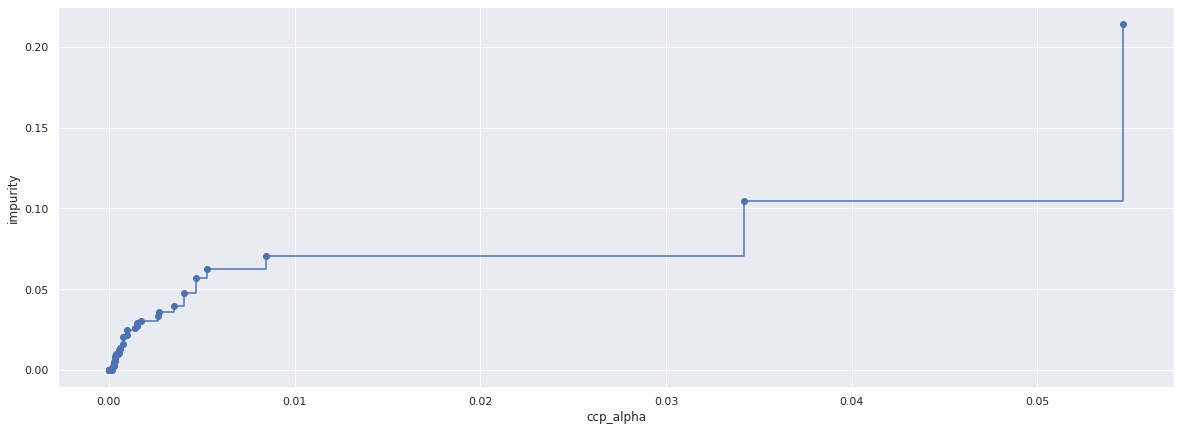

In [92]:
alpha = ccp_path['ccp_alphas'][:-1]   # the last one correspond to root node
impurity = ccp_path['impurities'][:-1]      # the last one correspond to root node

plt.figure(figsize = (20,7))
plt.plot(alpha, impurity, marker = 'o', drawstyle="steps-post");
plt.xlabel('ccp_alpha');
plt.ylabel('impurity');

In [93]:
recall_train = []  # recall score for training set
recall_test = []    # recall score for test set

for a in alpha:
    dt_3 = DecisionTreeClassifier(class_weight = 'balanced', random_state = 10, ccp_alpha = a).fit(X_train, y_train)
    y_pred_train = dt_3.predict(X_train)    
    y_pred_test = dt_3.predict(X_test)
    recall_train.append(recall_score(y_train, y_pred_train))
    recall_test.append(recall_score(y_test, y_pred_test))

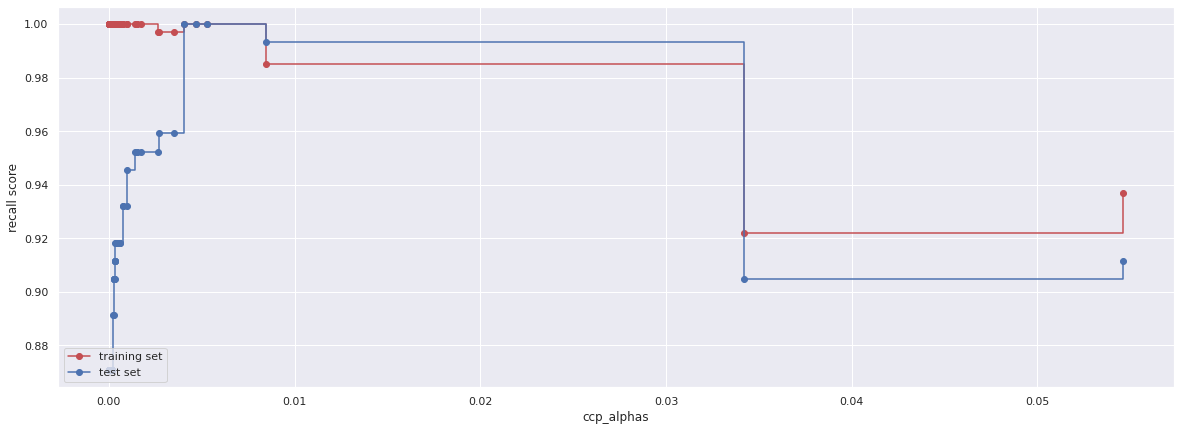

In [94]:
plt.figure(figsize = (20,7))    # plot training set and test set recall against ccp_alpha
plt.plot(alpha, recall_train, color = 'r', marker = 'o', drawstyle="steps-post", label = "training set");
plt.plot(alpha, recall_test, color = 'b', marker = 'o', drawstyle="steps-post", label = "test set");
plt.legend(loc = "lower left");
plt.xlabel('ccp_alphas');
plt.ylabel('recall score');

In [95]:
idx = np.argmax(recall_test)
print("optimal ccp_alpha: ", alpha[idx])

optimal ccp_alpha:  0.004055717375581131


**Observation:** When ccp_alpha = 0.004, recall score for test set is the highest.

In [96]:
dt_3 = DecisionTreeClassifier(random_state = 10, class_weight = "balanced", ccp_alpha = alpha[idx]).fit(X_train, y_train)
dt_3, y3_train, y3_test, metrics_3 = compute_metrics(dt_3, X_train, X_test, y_train, y_test)
print("Decision tree model with post-pruning")
metrics_3

Decision tree model with post-pruning


,Accuracy,Precision,Recall,F1 score
training set,0.937915,0.607664,1.0,0.755959
test set,0.942761,0.633621,1.0,0.775726


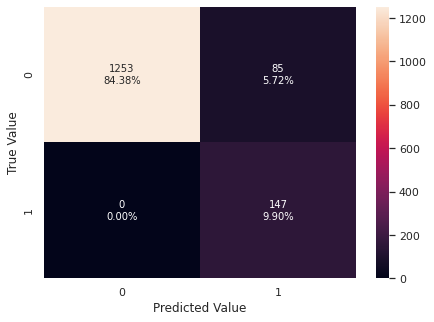

In [97]:
generate_confusion_matrix(y_test, y3_test)

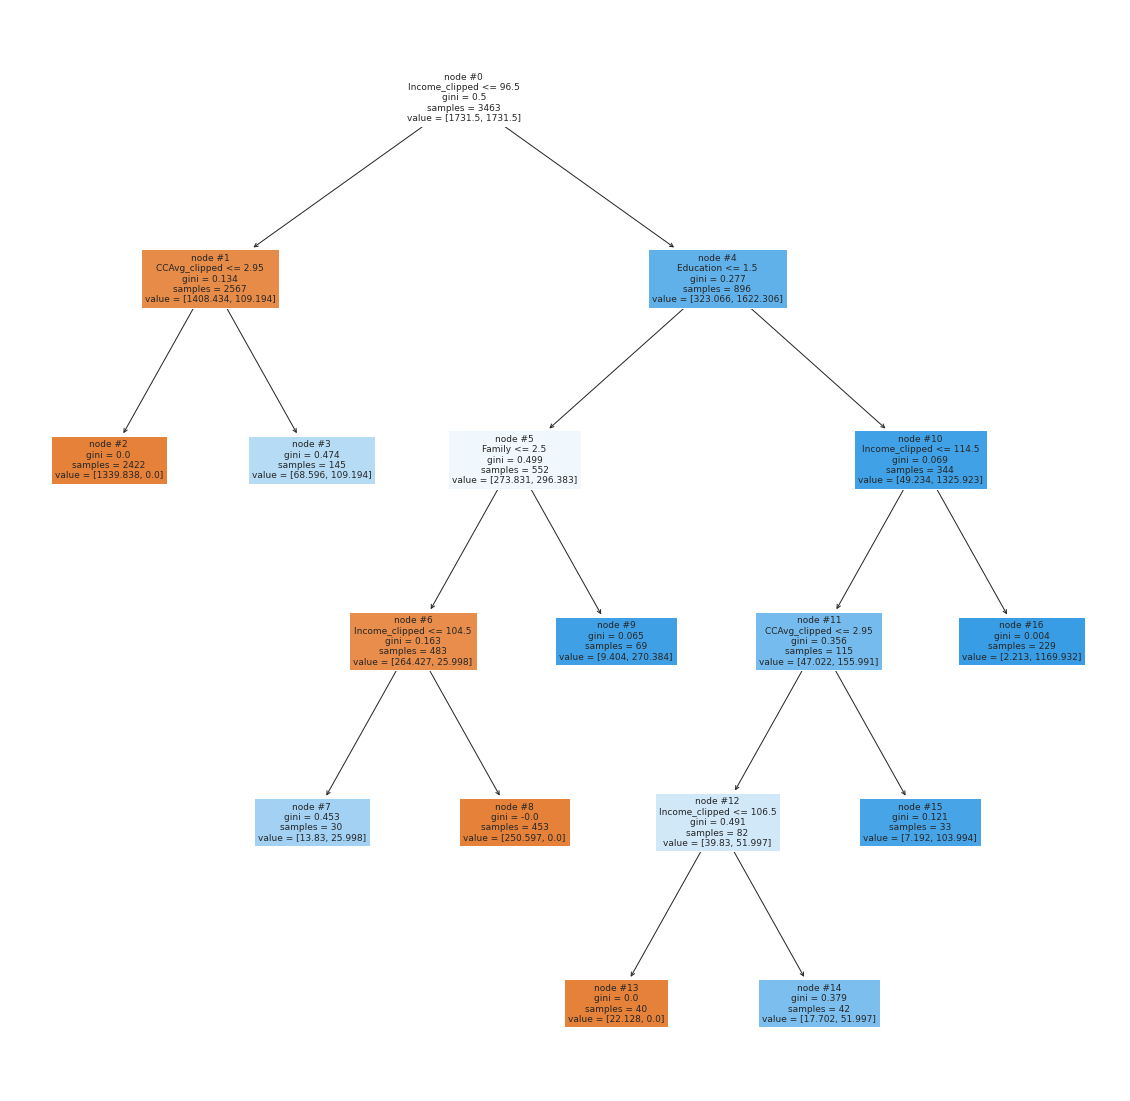

In [98]:
plt.figure(figsize = (20,20));
tree.plot_tree(dt_3, filled = True, feature_names = X_train.columns, node_ids = True, fontsize = 9); 

In [99]:
print(tree.export_text(dt_3, feature_names = X_train.columns.to_list()))

|--- Income_clipped <= 96.50
|   |--- CCAvg_clipped <= 2.95
|   |   |--- class: 0
|   |--- CCAvg_clipped >  2.95
|   |   |--- class: 1
|--- Income_clipped >  96.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income_clipped <= 104.50
|   |   |   |   |--- class: 1
|   |   |   |--- Income_clipped >  104.50
|   |   |   |   |--- class: 0
|   |   |--- Family >  2.50
|   |   |   |--- class: 1
|   |--- Education >  1.50
|   |   |--- Income_clipped <= 114.50
|   |   |   |--- CCAvg_clipped <= 2.95
|   |   |   |   |--- Income_clipped <= 106.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Income_clipped >  106.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- CCAvg_clipped >  2.95
|   |   |   |   |--- class: 1
|   |   |--- Income_clipped >  114.50
|   |   |   |--- class: 1



**Observation:** Compared to decison tree model 1, this tree becomes less complicated and the max depth decreases to 5 from 11. Recall for training set and test set are 1. Accuracy is 0.94.

In [100]:
pd.DataFrame(data = dt_3.feature_importances_, index = X_train.columns, 
             columns = ["feature importance"]).sort_values(by = "feature importance", ascending = False)

,feature importance
Income_clipped,0.674172
Family,0.139873
Education,0.101629
CCAvg_clipped,0.084326
Age,0.000000
Experience,0.000000
ZIPCode,0.000000
Mortgage,0.000000
Securities_Account,0.000000
CD_Account,0.000000


**Observation:** The first four key features are the same as those of decision tree model 1. Other features are considered trivial and assigned 0.

## Misclassification analysis

Do an analysis of all misclassified samples - Try to find a pattern among those

## Conclusion

**Conclusion on the dataset**
- All the customers in this dataset are from California, distributed among 242 cities.
- In the campagin last year, the bank gains 9.7% conversion rate. 
- Income is an important factor for loan acceptance. The higher the income, the higher the chance an individual would become a borrower.
- Credit card spending affects loan acceptance. The higher the monthly spending on credit cards, the higher the chance an individual would become a borrower.
- House mortgage is another factor to influence loan acceptance. Although the conversion rate between mortgage paid off group and non-paid off group are similar, those with higher balance of morgage are more likely to accept the loan, compared to low balance group.
- Customers who are more likely to accept the loan offers are those of family size of 3 or 4, or those with CD accounts or securities accounts with the bank, or higher education people.
- Conversion rate is very imbalanced among zip codes. Out of 467 zip codes, only 238 zip codes have sucessful conversion, ranging from 2% - 66%. By studying zip codes with high conversion rate or high number of borrowers, we find that the cities these zip codes belong to are either city with large populations, or city with lots of high income residents, or college towns.
-  Conversion rate is very imbalanced among cities. Out of 242 cities, only 141 have sucessful conversion, ranging from 3% - 66%. The city with highest conversion rate is Bella Vista, followed by Oak View and Valencia. The city that contributes the most borrowers is Los Angeles, followed by Berkeley and San Diego. We find that cities with large number of borrowers are those with large population and high income. However their conversion rate is not very high. In contrast, small citis get very high conversion rate due to less customers.

**Compare metrics between models**

| Model | Train Accuracy | Train Precison | Train Recall | Train F1 score | Test Accuracy | Test Precison | Test Recall | Test F1 score |
|--|--|--|--|--|--|--|--|--|
| Logistic Regression, threshold = 0.5 | 0.91 | 0.55 | 0.34 | 0.42 | 0.90 | 0.49 | 0.32 | 0.39 |
| Logistic Regression, threshold = 0.06 | 0.81 | 0.33 | 0.94 | 0.49 | 0.82 | 0.35 | 0.95 | 0.51 |
| Decision Tree, default setting | 1 | 1 | 1 | 1 | 0.98 | 0.92 | 0.88 | 0.90 |
| Class-weighted Decision Tree, pre-pruning | 0.93 | 0.58 | 0.98 | 0.73 | 0.94 | 0.62 | 0.99 | 0.76 |
| Class-weighted Decision Tree, post-pruning | 0.93 | 0.61 | 1 | 0.76 | 0.94 | 0.63 | 1 | 0.77 |

- Logistic regression model with default threshold 0.5 gets a high score for accuracy but doesn't do well on recall, which is a more important metrics in our case. After setting the threshold to optimal value, recall gets great improvement, jumping from 0.32 to 0.95 for test data.
- Decision tree with default setting is overfit with training data, but it still secures a decent recall score of 0.88 for test data. The reason may be decision tree makes no assumption on the data and thus it's more robust. However, it's not very good at handling imbalanced dataset. By applying class_weight and pre-pruning/ post-pruning, overfit problem mitigates and recall is lifted to 1.

## Recommendation

- Marketing campaign should target customers with at least one of the following characteristics:
    - Customers with advanced education, high income and monthly credit card spending. More specifically,
        - Income <= \\$ 96.5k, monthly credit card spending > \\$ 2.95k.
        - \\$ 96.5k < Income <= \\$ 104.5k, undergrduate education family without children.
        - Income > \\$ 96.5k, undergrduate education family with at least one children.
        - \\$ 106.5k < Income <= \\$ 114.5k, monthly credit card spending <= \\$ 2.95k, graduate or advanced education people.
        - Income > \\$ 114.5k, graduate or advanced education people.
        
    - Couples with at least one child.
    - House mortgage borrowers with high balance.
    - Customers with CD accounts or securities accounts with AllLife bank.
    
- Where to initiate marketing campaign?
    - College Town, such as Davis, Berkeley, Stanford, La Jolla.
    - City with large populations, such as San Francisco, Los Angeles, San Diego.
    - City with massive high income residents/ middle-class communities, such as Palo Alto, Los Altos, Santa Clara.